<a href="https://colab.research.google.com/github/paperspoon/prophet-time-series/blob/master/prophet_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://facebook.github.io/prophet/docs/quick_start.html

공홈 튜토리얼을 기반으로 만들었습니다. 정말 어마어마하게 간단하네요.

프로펫은 GPU를 사용하여 가속하는 기능은 아직 없는듯 하네요. (확실치 않음)

다른 ML라이브러리랑 특이하게 다른게 있다면 fit하는 시간에 비해 predict하는 시간이 깁니다.

여튼 어이가 없을정도로 짧은 코드를 보며 허탈하네요..ㅎㅎ


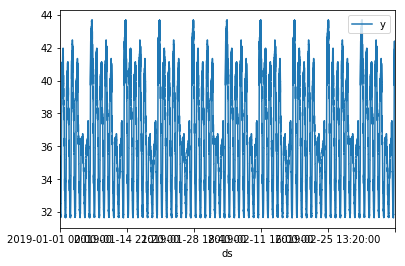

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

df = pd.read_csv('https://jogi-hckim.s3.ap-northeast-2.amazonaws.com/met_perf_memory.csv',  sep=',', names=['ds', 'y'])

# 약 10주치의 분단위 데이터
df = df[:100000]

df.plot(x='ds', y='y')

In [13]:
# 상한 100
df['cap'] = 100
# 하한 0
df['floor'] = 0
# 추세 유연성 스케일 조정  0.001 (기본값은 0.05)
m = Prophet(changepoint_prior_scale=0.001).fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


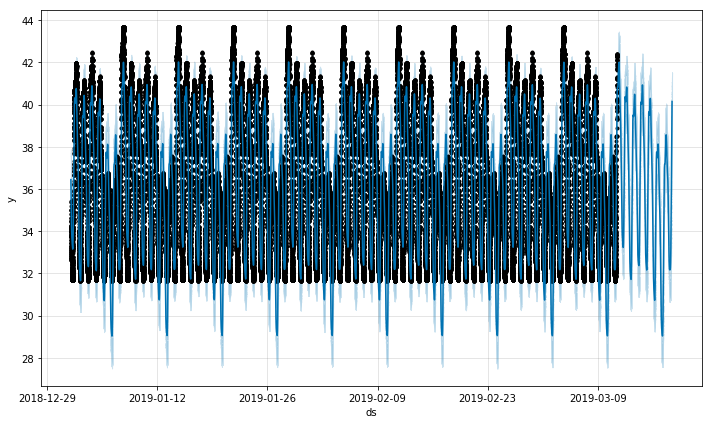

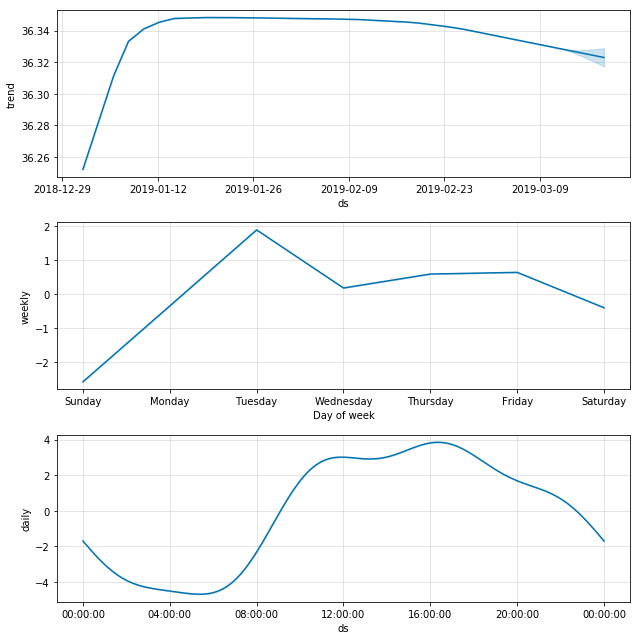

In [14]:
# 분단위로 일주일 예측
future = m.make_future_dataframe(periods=7*24*60, freq='min')
forecast = m.predict(future)
# 학습데이터와, 예측데이터
fig1 = m.plot(forecast)
# 관련 컴포넌트 데이터(trend, weekly, daily)
fig2 = m.plot_components(forecast)